### Import required libraries

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,5
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load & Read the data

In [6]:
df=pd.read_csv("D:/PGP IN DATA SCIENCE with Careerera/Data Sets/data-for-time-series/AirPassengers.csv")
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [15]:
df.shape

(144, 2)

In [16]:
df.size

288

In [17]:
df.columns

Index(['Month', '#Passengers'], dtype='object')

In [18]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

Data type of Month column is Object , we have to convert that to Date time to do Forecasting

In [7]:
df['Date']=pd.to_datetime(df['Month'], format='%Y-%m')
df.dtypes

Month                  object
#Passengers             int64
Date           datetime64[ns]
dtype: object

In [8]:
#drop column Month
df.drop('Month', axis=1, inplace=True)

#rename column '#passengers' to 'Passengers'
df.rename({'#Passengers':'Passengers'}, axis=1, inplace=True)
df.head()

,Passengers,Date
0,112,1949-01-01
1,118,1949-02-01
2,132,1949-03-01
3,129,1949-04-01
4,121,1949-05-01


### Check Whether all rows of data present or not

In [21]:
df['Date'].min()

Timestamp('1949-01-01 00:00:00')

In [22]:
df['Date'].max()

Timestamp('1960-12-01 00:00:00')

In [23]:
#12 years of data with 12 months
12*12

144

In [24]:
#shape of the data should be 144
df.shape

(144, 2)

We dont have any row missing.

#### Create Month & Year Column from Date column

In [5]:
df1=df.copy()
df1['Year']=df1['Date'].dt.year
df1['Month']=df1['Date'].dt.month
df1.head()

,Passengers,Date,Year,Month
0,112,1949-01-01,1949,1
1,118,1949-02-01,1949,2
2,132,1949-03-01,1949,3
3,129,1949-04-01,1949,4
4,121,1949-05-01,1949,5


#### Plot Passengers vs Month to see Seasonality

In [6]:
seasonality=df1.pivot("Month","Year", values="Passengers")
seasonality

Year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
Month,,,,,,,,,,,,
1,112,115,145,171,196,204,242,284,315,340,360,417
2,118,126,150,180,196,188,233,277,301,318,342,391
3,132,141,178,193,236,235,267,317,356,362,406,419
4,129,135,163,181,235,227,269,313,348,348,396,461
5,121,125,172,183,229,234,270,318,355,363,420,472
6,135,149,178,218,243,264,315,374,422,435,472,535
7,148,170,199,230,264,302,364,413,465,491,548,622
8,148,170,199,242,272,293,347,405,467,505,559,606
9,136,158,184,209,237,259,312,355,404,404,463,508


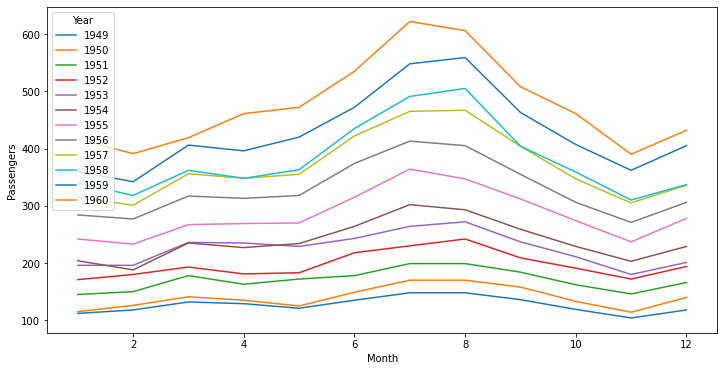

In [7]:
seasonality.plot(figsize=(12,6))
plt.xlabel("Month")
plt.ylabel("Passengers");

#### Plot Passengers vs Year to See Trend

In [30]:
trend=df1.pivot("Year","Month", values="Passengers")
trend

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


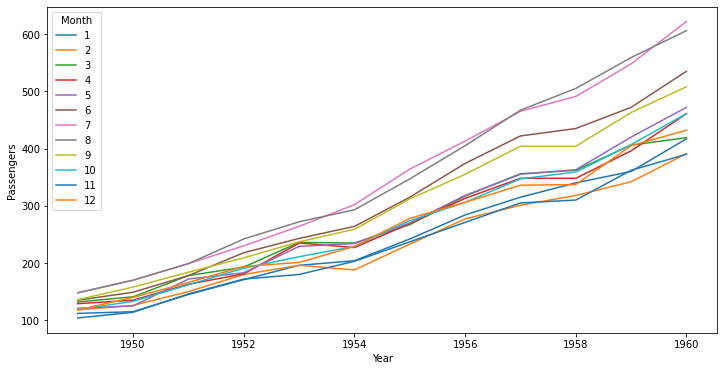

In [34]:
trend.plot(figsize=(12,6))
plt.xlabel("Year")
plt.ylabel("Passengers");

From 2 graphs we clearly see Trend which is "Positive" and Seasonality with Period "12 Months". So we have to use Multiplicative Decomposition.

In [11]:
#set Date column to Index 
df.set_index("Date", inplace=True)
df.head()

,Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [12]:
yt=df.Passengers
yt

Date
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, Length: 144, dtype: int64

### Forecast using Moving Average Method

In [39]:
Moving_Average_with_windows_2=yt.rolling(window=2).mean()
Moving_Average_with_windows_2.head()

Date
1949-01-01      NaN
1949-02-01    115.0
1949-03-01    125.0
1949-04-01    130.5
1949-05-01    125.0
Name: Passengers, dtype: float64

In [41]:
Moving_Average_with_window_3=yt.rolling(window=3).mean()
Moving_Average_with_window_3.head()

Date
1949-01-01           NaN
1949-02-01           NaN
1949-03-01    120.666667
1949-04-01    126.333333
1949-05-01    127.333333
Name: Passengers, dtype: float64

In [43]:
Moving_Average_with_window_4=yt.rolling(window=4).mean()
Moving_Average_with_window_4.head()

Date
1949-01-01       NaN
1949-02-01       NaN
1949-03-01       NaN
1949-04-01    122.75
1949-05-01    125.00
Name: Passengers, dtype: float64

In [44]:
Moving_Average_with_window_5=yt.rolling(window=5).mean()
Moving_Average_with_window_5.head()

Date
1949-01-01      NaN
1949-02-01      NaN
1949-03-01      NaN
1949-04-01      NaN
1949-05-01    122.4
Name: Passengers, dtype: float64

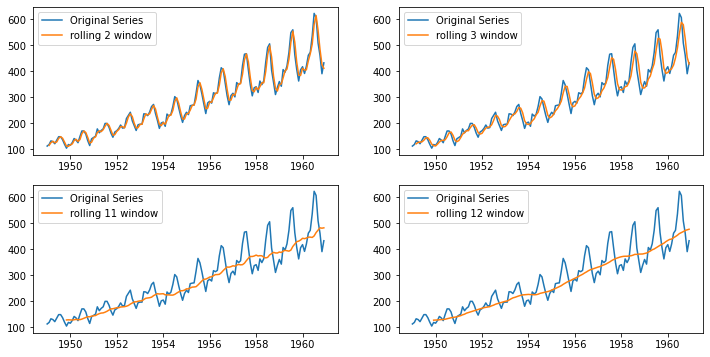

In [49]:
fig, axes=plt.subplots(2,2,sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(6)

axes[0][0].plot(yt.index, yt, label="Original Series")
axes[0][0].plot(yt.index, yt.rolling(window=2).mean(), label="rolling 2 window")
axes[0][0].legend()

axes[0][1].plot(yt.index, yt, label="Original Series")
axes[0][1].plot(yt.index, yt.rolling(window=3).mean(), label="rolling 3 window")
axes[0][1].legend()

axes[1][0].plot(yt.index, yt, label="Original Series")
axes[1][0].plot(yt.index, yt.rolling(window=11).mean(), label="rolling 11 window")
axes[1][0].legend()

axes[1][1].plot(yt.index, yt, label="Original Series")
axes[1][1].plot(yt.index, yt.rolling(window=12).mean(), label="rolling 12 window")
axes[1][1].legend()

plt.show()

**Trend and Seasonalality is clearly visible hence use Multiplicative Decomposition model**

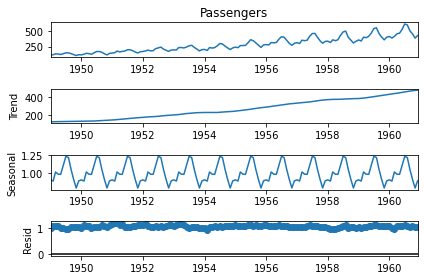

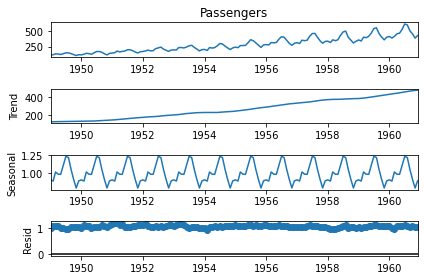

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(yt, model='multiplicative',two_sided=False, extrapolate_trend=4)
decomp.plot()

In [54]:
pd.DataFrame({"Actual":decomp.observed, "Seasonal":decomp.seasonal, "Trend":decomp.trend, "Resid":decomp.resid})

,Actual,Seasonal,Trend,Resid
Date,,,,
1949-01-01,112.0,0.907891,121.291667,1.017075
1949-02-01,118.0,0.891027,121.750000,1.087733
1949-03-01,132.0,1.016558,122.208333,1.062530
1949-04-01,129.0,0.985536,122.666667,1.067065
1949-05-01,121.0,0.983879,123.125000,0.998844
...,...,...,...,...
1960-08-01,606.0,1.216608,461.375000,1.079612
1960-09-01,508.0,1.051475,465.208333,1.038526
1960-10-01,461.0,0.916240,469.333333,1.072039


### Forecasting using ETS Method

#### Split data into train & test

In [60]:
train=yt[:"1960-06-01"]
test=yt["1960-07-01":]
print("Train Data\n", train.head())
print()
print("Test Data\n", test.head())

Train Data
 Date
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64

Test Data
 Date
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
Name: Passengers, dtype: int64


#### Train Our Model

In [61]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [65]:
#select different alpha, beta & gamma values
a=np.linspace(0,1,25) #alpha
b=np.linspace(0,1,25) #beta
g=np.linspace(0,1,25) #gamma

best_alpha=np.inf
best_beta=np.inf
best_gamma=np.inf
best_mse=np.inf

for i in a:
    for j in b:
        for k in g:
            ets=ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=12)
            ets=ets.fit(smoothing_level=i, smoothing_slope=j, smoothing_seasonal=k)
            fcast=ets.forecast(6)
            mse=np.mean((fcast-test)**2)
            if mse < best_mse:
                best_mse=mse
                best_alpha=i
                best_beta=j
                best_gamma=k
                
best_values={"Alpha\n":best_alpha, "Beta\n":best_beta, "Gamma\n":best_gamma, "MSE\n":best_mse}
print(best_values)

{'Alpha\n': 0.08333333333333333, 'Beta\n': 0.6666666666666666, 'Gamma\n': 0.20833333333333331, 'MSE\n': 53.28010645699887}


Lets use above values to train our model

In [66]:
alpha=0.08333333333333
beta=0.6666666666
gamma= 0.20833333333333331
ets=ExponentialSmoothing(train, trend='mul',seasonal='mul',seasonal_periods=12)
ets=ets.fit(smoothing_level=alpha, smoothing_slope=beta,smoothing_seasonal=gamma)

Now Forecast the Future values

In [67]:
fcast=ets.forecast(6)
fcast

1960-07-01    616.907708
1960-08-01    613.890702
1960-09-01    517.724776
1960-10-01    449.534922
1960-11-01    390.839882
1960-12-01    434.188609
Freq: MS, dtype: float64

In [68]:
test

Date
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, dtype: int64

In [69]:
print("MSE",np.mean((fcast-test)**2))

MSE 53.28488662621041


#### Plot Actual vs Predicted values

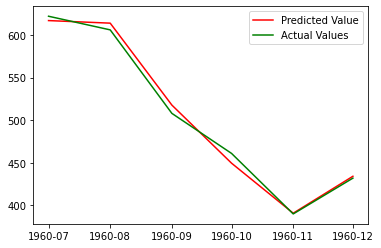

In [70]:
d=pd.DataFrame(fcast.reset_index())
d.columns=["Date","Predicted"]

d1=pd.DataFrame(test.reset_index())
d1.columns=["Date","Actual"]

final=pd.merge(d,d1,on="Date",how="inner")

plt.plot(final["Date"],final["Predicted"], label="Predicted Value", color="red")
plt.plot(final["Date"],final["Actual"], label="Actual Values",color="green")
plt.legend()
plt.show()

#### Forecast for unseen data & Plot it

In [72]:
fcast=ets.forecast(18)
fcast

1960-07-01    616.907708
1960-08-01    613.890702
1960-09-01    517.724776
1960-10-01    449.534922
1960-11-01    390.839882
1960-12-01    434.188609
1961-01-01    444.296764
1961-02-01    423.442012
1961-03-01    483.332820
1961-04-01    481.971926
1961-05-01    492.589806
1961-06-01    566.608691
1961-07-01    633.502185
1961-08-01    630.404023
1961-09-01    531.651287
1961-10-01    461.627163
1961-11-01    401.353259
1961-12-01    445.868043
Freq: MS, dtype: float64

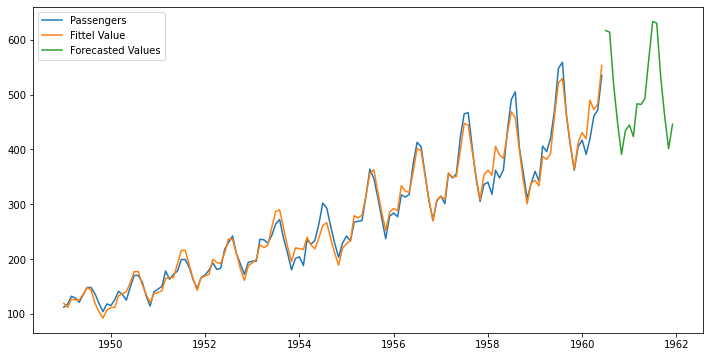

In [73]:
plt.figure(figsize=(12,6))
plt.plot(train, label='Passengers')
plt.plot(ets.fittedvalues, label='Fittel Value')
plt.plot(fcast, label='Forecasted Values')
plt.legend()
plt.show()

### Forecast using SARIMAX method

In [13]:
yt=df.Passengers
yt

Date
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, Length: 144, dtype: int64

#### Check for Stationary

* 1) By Graph

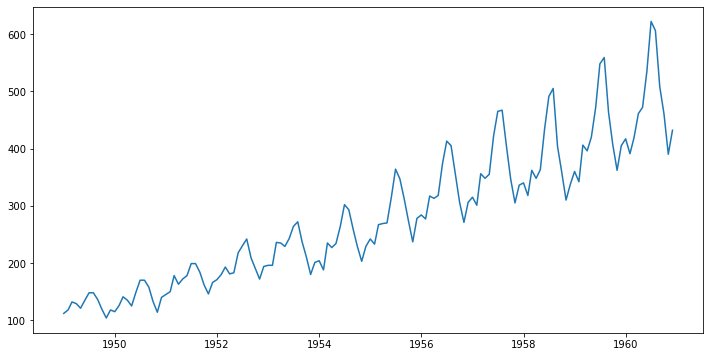

In [13]:
plt.figure(figsize=(12,6))
plt.plot(yt)
plt.show()

From graph we cannot say our Series in stationary because, we can clearly see Seasonality & Trend

* 2) Apply ADfuller test-

In [14]:
from statsmodels.tsa.stattools import adfuller
print("Results Of Dickey-Fuller Test")
dftest=adfuller(yt)
dfoutput=pd.Series(dftest[0:4], index=['Test Statistics','p-Value','Lags Used',
                                       'Number of Observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key]=value
print(dfoutput)

Results Of Dickey-Fuller Test
Test Statistics                  0.815369
p-Value                          0.991880
Lags Used                       13.000000
Number of Observations used    130.000000
Critical value (1%)             -3.481682
Critical value (5%)             -2.884042
Critical value (10%)            -2.578770
dtype: float64


As p-value is greater than alpha(0.05), Series is not Stationary.

We can take difference of series and aaply that to adfuller test % check the p-value.

In [15]:
yt1=yt.diff(3).dropna()
yt1

Date
1949-04-01     17.0
1949-05-01      3.0
1949-06-01      3.0
1949-07-01     19.0
1949-08-01     27.0
              ...  
1960-08-01    134.0
1960-09-01    -27.0
1960-10-01   -161.0
1960-11-01   -216.0
1960-12-01    -76.0
Name: Passengers, Length: 141, dtype: float64

In [16]:
print("Results Of Dickey-Fuller Test")
dftest=adfuller(yt1)
dfoutput=pd.Series(dftest[0:4], index=['Test Statistics','p-Value','Lags Used',
                                       'Number of Observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key]=value
print(dfoutput)

Results Of Dickey-Fuller Test
Test Statistics                 -2.886506
p-Value                          0.046940
Lags Used                       10.000000
Number of Observations used    130.000000
Critical value (1%)             -3.481682
Critical value (5%)             -2.884042
Critical value (10%)            -2.578770
dtype: float64


After taking 3 difference p-value is less than alpha(0.05), hence series is approaching toward stationary.

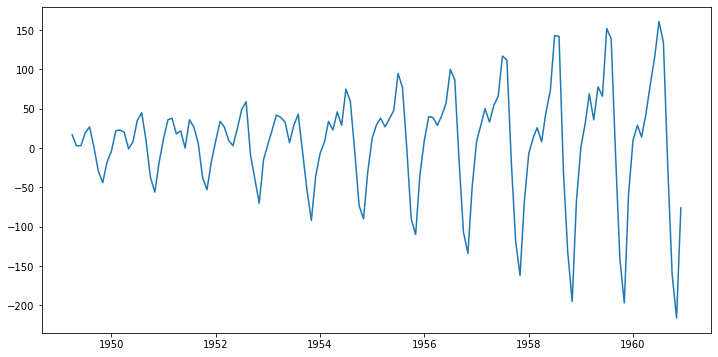

In [17]:
plt.figure(figsize=(12,6))
plt.plot(yt1)
plt.show()

Now we can see the Trend but not like before, Hence Series is aprroaching to Stationary.

We can also try log tranformation and then check the p-value.

In [18]:
yt1=np.log(yt).diff(2).dropna()
yt1

Date
1949-03-01    0.164303
1949-04-01    0.089128
1949-05-01   -0.087011
1949-06-01    0.045462
1949-07-01    0.201422
                ...   
1960-08-01    0.124613
1960-09-01   -0.202459
1960-10-01   -0.273482
1960-11-01   -0.264335
1960-12-01   -0.064972
Name: Passengers, Length: 142, dtype: float64

In [19]:
print("Results Of Dickey-Fuller Test")
dftest=adfuller(yt1)
dfoutput=pd.Series(dftest[0:4], index=['Test Statistics','p-Value','Lags Used',
                                       'Number of Observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key]=value
print(dfoutput)

Results Of Dickey-Fuller Test
Test Statistics                 -3.167907
p-Value                          0.021919
Lags Used                       11.000000
Number of Observations used    130.000000
Critical value (1%)             -3.481682
Critical value (5%)             -2.884042
Critical value (10%)            -2.578770
dtype: float64


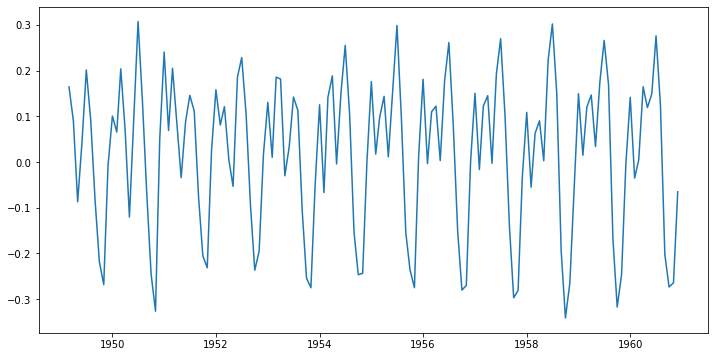

In [20]:
plt.figure(figsize=(12,6))
plt.plot(yt1)
plt.show()

Now the trend is gone and p-value(0.021919) is less than alpha value(0.05) hence Series Stationary.

**To Know p,d,q,P,D,Q,Period. Plot Autocorelation & Partial-Autocorelation graph.**

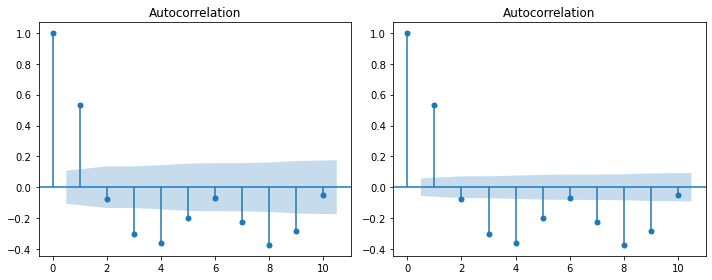

In [22]:
import statsmodels.tsa.api as smt
fig,axes=plt.subplots(1,2,sharex=False,sharey=False)
fig.set_figwidth(10)
fig.set_figheight(4)
smt.graphics.plot_acf(yt1, lags=10, ax=axes[0], alpha=0.2) # Autocorelation
smt.graphics.plot_acf(yt1, lags=10, ax=axes[1], alpha=0.5) # Partial-Autocorelation
plt.tight_layout()

In [27]:
yt_log=np.log(yt).dropna()
yt_log

Date
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: Passengers, Length: 144, dtype: float64

In [28]:
train=yt_log[:"1960-06-01"]
test=yt_log["1960-07-01":]
print("Train Data\n", train.head())
print()
print("Test Data\n", test.head())

Train Data
 Date
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
Name: Passengers, dtype: float64

Test Data
 Date
1960-07-01    6.432940
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
Name: Passengers, dtype: float64


#### Now Create model & Train it

In [29]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(train, order=(1,2,1), seasonal_order=(1,0,1,12),
                               enforce_stationarity=False,
                                enforce_invertibility=False).fit()

In [30]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  138
Model:             SARIMAX(1, 2, 1)x(1, 0, 1, 12)   Log Likelihood                 221.354
Date:                            Sat, 10 Dec 2022   AIC                           -432.707
Time:                                    18:57:51   BIC                           -418.687
Sample:                                01-01-1949   HQIC                          -427.013
                                     - 06-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3433      0.073     -4.690      0.000      -0.487      -0.200
ma.L1         -0.9999     21.966   

In [31]:
y_fcast=np.exp(model.forecast(6))
y_fcast

1960-07-01    613.187067
1960-08-01    619.758742
1960-09-01    517.502963
1960-10-01    453.769809
1960-11-01    398.951593
1960-12-01    443.769258
Freq: MS, Name: predicted_mean, dtype: float64

In [32]:
y_orig=np.exp(test)
y_orig

Date
1960-07-01    622.0
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Name: Passengers, dtype: float64

In [33]:
print("MSE", np.mean((y_fcast-y_orig)**2))

MSE 104.6998646331411


To choose better values of order & seasonal_order use itertool method.

p=[0,1,2]
d=[0,1,2]
q=[1,2,3]
P=[0,1,2]
D=[0]
Q=[0,1,2]
period=12

import itertools

pdq=list(itertools.product(p,d,q))
seasonal_pdq= [(x[0], x[1], x[2], 12) for x in list(itertools.product(P,D,Q))]

best_pdq=None
best_PDQ=None
best_mse=np.inf

for i in pdq:
    for j in seasonal_pdq:
        model=sm.tsa.statespace.SARIMAX(train, order=i, seasonal_order=j,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False).fit()
        fcast=np.exp(model.forecast(6))
        test=np.exp(test)
        mse=np.mean((fcast-test)**2)
        if mse<best_mse:
            best_pdq=i
            best_PDQ=j
            best_mse=mse

best_mse

best_pdq

best_PDQ

Lets use above values to train our mode

model=sm.tsa.statespace.SARIMAX(train, order=(0,0,1),seasonal_order=(0,0,0,12),
                               enforce_stationarity=False,
                                enforce_invertibility=False).fit()

fcast=model.forecast(6)
fcast

test

print("MSE",np.mean((fcast-test)**2))

#### Actuual vs Predicted Values

d=pd.DataFrame(fcast.reset_index())
d.columns=["Date","Predicted"]

d1=pd.DataFrame(test.reset_index())
d1.columns=["Date","Actual"]
final=pd.merge(d,d1,on="Date",how="inner")
plt.plot(final["Date"],final["Predicted"], label="Predicted Value", color="red")
plt.plot(final["Date"],final["Actual"], label="Actual Values",color="green")
plt.legend()
plt.show()

Forecast for Unseen Data

fcast=ets_fit.forecast(18)
fcast

plt.figure(figsize=(12,6))
plt.plot(train, label='Tractor Sales')
plt.plot(ets_fit.fittedvalues, label='Fittel Value')
plt.plot(fcast, label='Forecasted Sale')
plt.legend()
plt.show()